Class: CS 4412/01

Term: Spring 2020

Name: Sepehr Goshayeshi

Instructor: Ephina Thendral Surendranath

Class Assignment 2

In [0]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
all_data = pd.read_csv('/content/drive/My Drive/Live.csv')
data =all_data[['status_type', 'num_reactions', 'num_comments', 'num_shares', 
                'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].copy()
data["status_type"] = LabelEncoder().fit_transform(data['status_type'])
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


### KMeans

In [0]:
for num_cluster in [4,6,10,12,20]:
    kmeans = KMeans(n_clusters=num_cluster, random_state=42).fit(data)
    n_uniqes = pd.np.unique(kmeans.labels_,return_counts=True)
    print('n_cluster:',num_cluster, end='')
    print(' => ', end='')
    print(n_uniqes)
kmeans = KMeans(n_clusters=10, random_state=42).fit(data)
n_uniqes = pd.np.unique(kmeans.labels_,return_counts=True)

n_cluster: 4 => (array([0, 1, 2, 3], dtype=int32), array([6291,  277,  430,   52]))
n_cluster: 6 => (array([0, 1, 2, 3, 4, 5], dtype=int32), array([5947,  105,  367,  216,   11,  404]))
n_cluster: 10 => (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([4874,   30,  193,  535,    3,  144,  252,   86,   86,  847]))
n_cluster: 12 => (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([4830,   40,  189,  532,    3,  184,  247,   83,   86,  834,   13,
          9]))
n_cluster: 20 => (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32), array([4141,   25,  132,    8,   38,   99,   78,  143,    3,   35,  412,
        438,   20, 1003,  114,   11,   29,   55,   44,  222]))


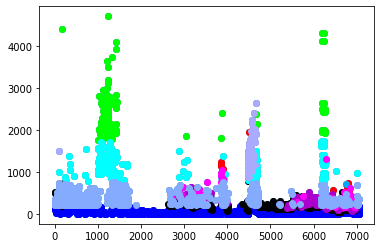

In [0]:
colors = ['#0000FF','#FF0000','#00FF00','#000000','#00AAFF','#AB00CD','#00FFFF','#FF00FF','#AAAAFF','#84ABFD']
plt.scatter(data.index,data['num_reactions'])
for i in range(kmeans.n_clusters):
    x_plot = data.iloc[kmeans.labels_==i]['num_reactions']
    plt.scatter(x_plot.index,x_plot,c=colors[i])

### AgglomerativeClustering

In [0]:
for num_cluster in [4,10,15]:
    for linkage in ['ward', 'complete', 'average', 'single']:
        clustering = AgglomerativeClustering(n_clusters=num_cluster,linkage=linkage).fit(data)
        n_uniqes = pd.np.unique(clustering.labels_,return_counts=True)
        print('n_cluster:',num_cluster, end=' ')
        print(f'linkage:{linkage}',end='')
        print(' => ', end='')
        print(n_uniqes)
    print('###########')
clustering = AgglomerativeClustering(n_clusters=10,linkage='ward').fit(data)
n_uniqes = pd.np.unique(clustering.labels_,return_counts=True)

n_cluster: 4 linkage:ward => (array([0, 1, 2, 3]), array([ 101,  515, 6121,  313]))
n_cluster: 4 linkage:complete => (array([0, 1, 2, 3]), array([  52,  131, 6864,    3]))
n_cluster: 4 linkage:average => (array([0, 1, 2, 3]), array([7027,    3,    9,   11]))
n_cluster: 4 linkage:single => (array([0, 1, 2, 3]), array([7047,    1,    1,    1]))
###########
n_cluster: 10 linkage:ward => (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 218,  219,   28,  627, 4336,  296,   70, 1158,   95,    3]))
n_cluster: 10 linkage:complete => (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([   9,   43, 6684,   48,   11,    2,  130,    2,  120,    1]))
n_cluster: 10 linkage:average => (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([   9,  288,   49, 6587,    2,    1,  101,    1,   11,    1]))
n_cluster: 10 linkage:single => (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([7037,    5,    1,    1,    1,    1,    1,    1,    1,    1]))
###########
n_cluster: 15 linkage:ward => (array([ 0,  1,  2,  3,  4,  5,  6, 

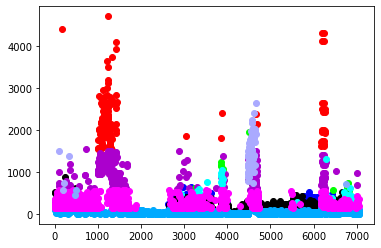

In [0]:
colors = ['#0000FF','#FF0000','#00FF00','#000000','#00AAFF','#AB00CD','#00FFFF','#FF00FF','#AAAAFF','#84ABFD']
for i in range(clustering.n_clusters):
    x_plot = data.iloc[clustering.labels_==i]['num_reactions']
    plt.scatter(x_plot.index,x_plot,c=colors[i])